**1. Получение данных**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

data_set = pd.read_csv('../base/Laptop_price.csv')
display(data_set.describe())

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [2]:
duplicates_count = data_set.duplicated().sum()
display(f"Количество дубликатов: {duplicates_count}")

for i in range(len(data_set.columns)):
    duplicates = data_set[data_set.columns[i]].duplicated().sum()
    print(f"дубликатов {data_set.columns[i]}: {duplicates}")

'Количество дубликатов: 0'

дубликатов Brand: 995
дубликатов Processor_Speed: 0
дубликатов RAM_Size: 996
дубликатов Storage_Capacity: 997
дубликатов Screen_Size: 0
дубликатов Weight: 0
дубликатов Price: 0


<AxesSubplot: >

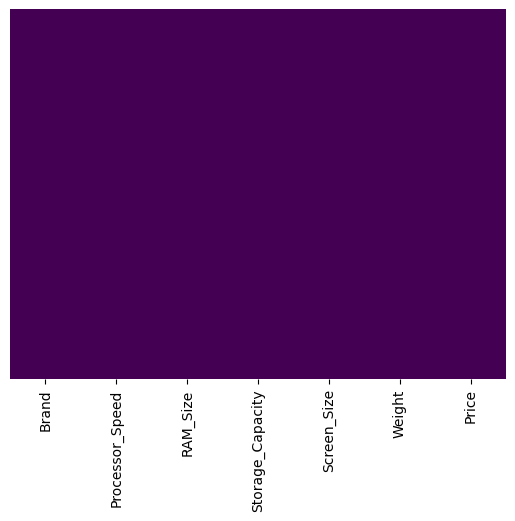

In [3]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**2. Очистка данных**

In [ ]:
tmp = data_set.copy()
tmp.drop_duplicates(inplace=True)
# display(cleanDS.describe())

In [ ]:
df_numerical = tmp.select_dtypes(include = [np.number])
df_categorical = tmp.select_dtypes(exclude = [np.number])
display(df_numerical.describe())
display(df_categorical.describe())

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


,Brand
count,1000
unique,5
top,Dell
freq,210


In [16]:
print(df_numerical.nunique())
# print(df_categorical.nunique())

Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
dtype: int64


In [29]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_new = onehotencoder.fit_transform(df_categorical.values)
da = pd.DataFrame(data_new.toarray(), columns=onehotencoder.categories_)
display(da.describe())

,Acer,Asus,Dell,HP,Lenovo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.204000,0.206000,0.210000,0.190000,0.190000
std,0.403171,0.404633,0.407512,0.392497,0.392497
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
cleanData = pd.concat([df_numerical, da], axis=1)
display(cleanData.describe())

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,"(Acer,)","(Asus,)","(Dell,)","(HP,)","(Lenovo,)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963,0.204000,0.206000,0.210000,0.190000,0.190000
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880,0.403171,0.404633,0.407512,0.392497,0.392497
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037,1.000000,1.000000,1.000000,1.000000,1.000000


### **3. Разделение данных на обучающую и тестовую выборки**  

**3.1 Дискретизация**

In [ ]:
baseDF = cleanData.copy()
# baseDF = data_set.copy()
df = pd.DataFrame()
dfLength = len(baseDF)
# print(f'data_set length: {dfLength}')
for i in range(len(baseDF.columns)):
    if baseDF[baseDF.columns[i]].dtype != np.float_:
      df.insert(i, baseDF.columns[i], baseDF[baseDF.columns[i]])
    else:
      df.insert(i, baseDF.columns[i], np.arange(dfLength, dtype='int64'))
display(df)

def discretizeFloatToInt(out, y, column):
  nStep = 5
  ma = max(y)
  mi = min(y)
  step = (ma - mi) / nStep
  # print(f'max: {max(y)}, min: {min(y)}, step: {step}')
  for i in range(len(y)):
    for idx in range(1, nStep + 1):
      if y[i] <= mi + idx * step:
        # print(f"y[i] = {y[i]}, [{mi + (idx - 1) * step}, {mi + idx * step}], index: {idx}")
        out.at[i, column] = idx
        break

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,0,16,512,0,0,0
1,Acer,1,4,1000,1,1,1
2,Lenovo,2,4,256,2,2,2
3,Acer,3,16,512,3,3,3
4,Acer,4,32,1000,4,4,4
...,...,...,...,...,...,...,...
995,HP,995,4,1000,995,995,995
996,Dell,996,8,256,996,996,996
997,Dell,997,4,512,997,997,997
998,Asus,998,8,256,998,998,998


## Дискретизация признаков

In [53]:
for i in range(len(baseDF.columns)):
    # print(baseDF[baseDF.columns[i]].dtype)
    if baseDF[baseDF.columns[i]].dtype == np.float64:
        # print("discretized")
        discretizeFloatToInt(df, baseDF[baseDF.columns[i]], baseDF.columns[i])
display(df.describe())
display(df)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.005000,15.500000,584.576000,3.055000,2.959000,2.662000
std,1.431441,10.988665,313.438517,1.379086,1.423849,1.719509
min,1.000000,4.000000,256.000000,1.000000,1.000000,1.000000
25%,2.000000,8.000000,256.000000,2.000000,2.000000,1.000000
50%,3.000000,16.000000,512.000000,3.000000,3.000000,2.000000
75%,4.000000,32.000000,1000.000000,4.000000,4.000000,5.000000
max,5.000000,32.000000,1000.000000,5.000000,5.000000,5.000000


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,5,16,512,1,2,2
1,Acer,3,4,1000,1,3,5
2,Lenovo,4,4,256,1,1,1
3,Acer,5,16,512,2,5,2
4,Acer,4,32,1000,4,4,5
...,...,...,...,...,...,...,...
995,HP,4,4,1000,2,2,5
996,Dell,3,8,256,2,3,1
997,Dell,4,4,512,2,3,2
998,Asus,1,8,256,1,4,1


In [54]:
print(data_set['Price'])
print(data_set.columns)
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]])


0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64
Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')
Brand
0        Asus
1        Acer
2      Lenovo
3        Acer
4        Acer
        ...  
995        HP
996      Dell
997      Dell
998      Asus
999    Lenovo
Name: Brand, Length: 1000, dtype: object
Processor_Speed
0      5
1      3
2      4
3      5
4      4
      ..
995    4
996    3
997    4
998    1
999    1
Name: Processor_Speed, Length: 1000, dtype: int64
RAM_Size
0      16
1       4
2       4
3      16
4      32
       ..
995     4
996     8
997     4
998     8
999     4
Name: RAM_Size, Length: 1000, dtype: int64
Storage_Capacity
0       512
1      1000
2       256
3       512
4      1000
  

**4. Выделение признаков**

In [55]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Brand: ['Asus' 'Acer' 'Lenovo' 'HP' 'Dell']
Processor_Speed: [5 3 4 1 2]
RAM_Size: [16  4 32  8]
Storage_Capacity: [ 512 1000  256]
Screen_Size: [1 2 4 3 5]
Weight: [2 3 1 5 4]
Price: [2 5 1 3]


## Gain Ratio

In [56]:
# Entropy 
def entropy(y):
  counts = np.bincount(y)
  probabilities = counts / len(y)
  return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Information Gain (IG)
def informationGain(dataSet, featureClass, featureIdx):
  totalEntropy = entropy(featureClass)
  values, counts = np.unique(dataSet[:, featureIdx], return_counts=True)
  weightedEntropy = 0

  for value, count in zip(values, counts):
      subset = featureClass[dataSet[:, featureIdx] == value]
      weightedEntropy += (count / len(dataSet)) * entropy(subset)

  return totalEntropy - weightedEntropy

# Split Information (SI)
def splitInformation(dataSet, featureIdx):
    values, counts = np.unique(dataSet[:, featureIdx], return_counts=True)
    probabilities = counts / len(dataSet)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Gain Ratio
def gainRatio(dataSet, featureClass, featureIdx):
    ig = informationGain(dataSet, featureClass, featureIdx)
    iv = splitInformation(dataSet, featureIdx)
    return ig / iv if iv != 0 else 0

In [57]:
ds = df.drop(['Price'], axis=1)
columns = ds.columns.tolist()
ds = ds.values
y = df['Price'].values
scores = [gainRatio(ds, y, i) for i in range(ds.shape[1])]

ranking = np.argsort(scores)[::-1]
print("Gain Ratio:")
for i in ranking:
    print(f"{columns[i]}: {scores[i]:.5f}")

Gain Ratio:
Storage_Capacity: 1.00000
RAM_Size: 0.01319
Processor_Speed: 0.00708
Screen_Size: 0.00481
Brand: 0.00477
Weight: 0.00331


In [58]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, VarianceThreshold
x = df.drop(['Brand', 'Price'], axis=1)
# x = df.drop(['Price'], axis=1)
y = df['Price']
display(x.describe())
tmpSelector = VarianceThreshold()
X_train_filtered = tmpSelector.fit_transform(x)
kbest = SelectKBest(score_func = chi2, k = 'all')
kbest.fit(X_train_filtered, y)

scores = kbest.scores_
feature_names = x.columns
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

print("Признаки в порядке значимости:")
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score:.2f}")


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.005000,15.500000,584.576000,3.055000,2.959000
std,1.431441,10.988665,313.438517,1.379086,1.423849
min,1.000000,4.000000,256.000000,1.000000,1.000000
25%,2.000000,8.000000,256.000000,2.000000,2.000000
50%,3.000000,16.000000,512.000000,3.000000,3.000000
75%,4.000000,32.000000,1000.000000,4.000000,4.000000
max,5.000000,32.000000,1000.000000,5.000000,5.000000


Признаки в порядке значимости:
Storage_Capacity: 167891.70
RAM_Size: 200.95
Processor_Speed: 11.07
Weight: 1.88
Screen_Size: 0.92


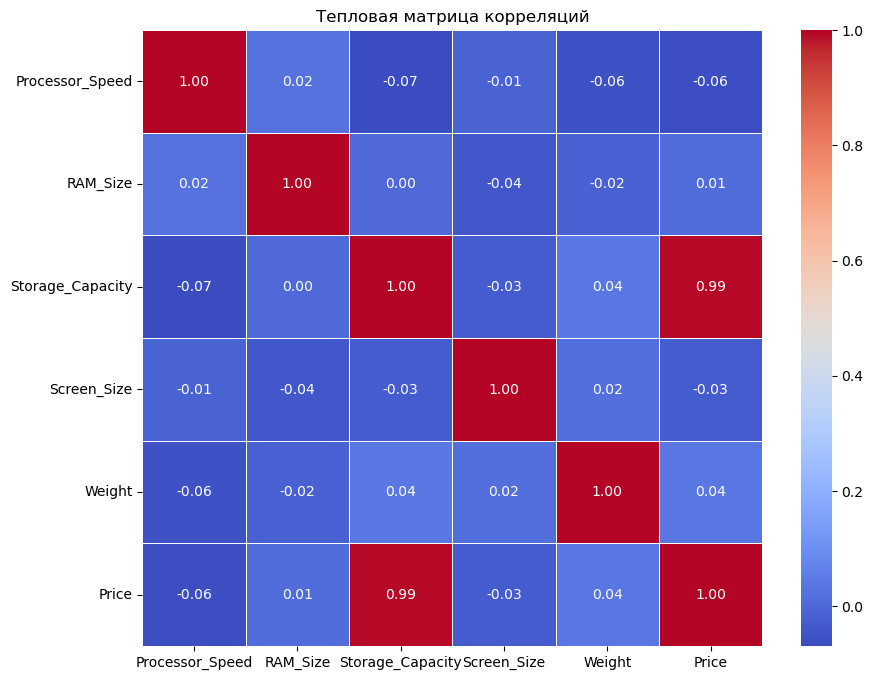

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.drop(['Brand'], axis=1).corr()
# corr_matrix = df.copy()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая матрица корреляций')
plt.show()